In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = "NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013.csv"
#crime_data_original = pd.read_csv(data_path, delimiter= ',', converters={"Robbery":int, "Murder":int})

#crime_data_original = pd.read_csv(data_path, delimiter= ',')
#crime_data_original

crime_data_original = pd.read_csv(data_path, sep=',', thousands=',', engine='python')
#crime_data_original['Population'] = crime_data_original['Population'].astype('int')

In [3]:
crime_data_original = crime_data_original[['City','Population','Violent crime','Murder','Rape (legacy definition)2','Robbery','Aggravated assault','Property crime','Burglary','Larceny - theft','Motor vehicle theft']]


# crime_data_original.isnull().sum()

# crime_data_original.dropna(inplace=True)

# crime_data_original.isnull().sum()

In [4]:
crime_data_original.isnull().sum()

crime_data_original.dropna(inplace=True)

crime_data_original.isnull().sum()

City                         0
Population                   0
Violent crime                0
Murder                       0
Rape (legacy definition)2    0
Robbery                      0
Aggravated assault           0
Property crime               0
Burglary                     0
Larceny - theft              0
Motor vehicle theft          0
dtype: int64

In [5]:
# create categorical variables for Murder & Robbery
# values = 0 set to 0
# vlaues > 0 set to 1
#crime_data['Robbery'] = (crime_data_original['Robbery'] > 0)
crime_data_original
crime_data_original['Population'] = crime_data_original['Population'].astype('int')
crime_data_original['Murder'] = crime_data_original['Murder'].astype('int')
crime_data_original['Robbery'] = crime_data_original['Robbery'].astype('int')
crime_data_original

,City,Population,Violent crime,Murder,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny - theft,Motor vehicle theft
0,Adams Village,1861,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0
1,Addison Town and Village,2577,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0
2,Akron Village,2846,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0
3,Albany,97956,791.0,8,30.0,227,526.0,4090.0,705.0,3243.0,142.0
4,Albion Village,6388,23.0,0,3.0,4,16.0,223.0,53.0,165.0,5.0
5,Alfred Village,4089,5.0,0,0.0,3,2.0,46.0,10.0,36.0,0.0
6,Allegany Village,1781,3.0,0,0.0,0,3.0,10.0,0.0,10.0,0.0
7,Amherst Town,118296,107.0,1,7.0,31,68.0,2118.0,204.0,1882.0,32.0
8,Amityville Village,9519,9.0,0,2.0,4,3.0,210.0,16.0,188.0,6.0
9,Amsterdam,18182,30.0,0,0.0,12,18.0,405.0,99.0,291.0,15.0


(array([347.,   0.,   0.,   0.,   1.]),
 array([    0.,  3834.,  7668., 11502., 15336., 19170.]),
 <a list of 5 Patch objects>)

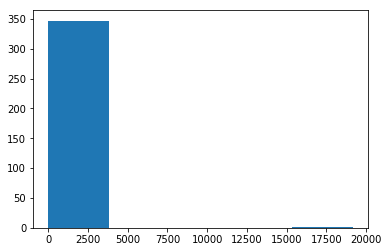

In [14]:
plt.hist(crime_data_original['Robbery'],5)

In [15]:
crime_data_original['Robbery_cat'] = [1 if np.float(i) > 0 else 0 for i in crime_data_original['Robbery']] 
crime_data_original['Murder_cat'] = [1 if np.float(i) > 0 else 0 for i in crime_data_original['Murder']] 
crime_data_original['Pop2'] = [i*i for i in crime_data_original['Population']] 

In [16]:
crime_data_original

,City,Population,Violent crime,Murder,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny - theft,Motor vehicle theft,Robbery_cat,Murder_cat,Pop2
0,Adams Village,1861,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0,0,0,3463321
1,Addison Town and Village,2577,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0,0,0,6640929
2,Akron Village,2846,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0,0,0,8099716
3,Albany,97956,791.0,8,30.0,227,526.0,4090.0,705.0,3243.0,142.0,1,1,9595377936
4,Albion Village,6388,23.0,0,3.0,4,16.0,223.0,53.0,165.0,5.0,1,0,40806544
5,Alfred Village,4089,5.0,0,0.0,3,2.0,46.0,10.0,36.0,0.0,1,0,16719921
6,Allegany Village,1781,3.0,0,0.0,0,3.0,10.0,0.0,10.0,0.0,0,0,3171961
7,Amherst Town,118296,107.0,1,7.0,31,68.0,2118.0,204.0,1882.0,32.0,1,1,13993943616
8,Amityville Village,9519,9.0,0,2.0,4,3.0,210.0,16.0,188.0,6.0,1,0,90611361
9,Amsterdam,18182,30.0,0,0.0,12,18.0,405.0,99.0,291.0,15.0,1,0,330585124


In [32]:
#X = crime_data_original[['Pop2', 'Murder', 'Robbery', 'Burglary']]
X = crime_data_original[['Population','Pop2', 'Murder_cat', 'Robbery_cat']]
y = crime_data_original['Property crime']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
Population,3.620664e-02
Pop2,-2.294767e-09
Murder_cat,-2.617076e+01
Robbery_cat,-1.186552e+02


In [35]:
from sklearn import metrics

y_pred = regressor.predict(X_test)  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 216.1788310551251
Mean Squared Error: 131023.91664320244
Root Mean Squared Error: 361.97225949401485


In [36]:
crime_data_original['Property crime'].head(11)

0       12.0
1       24.0
2       16.0
3     4090.0
4      223.0
5       46.0
6       10.0
7     2118.0
8      210.0
9      405.0
10      39.0
Name: Property crime, dtype: float64

In [37]:
y_pred

array([-4.34665123e+01, -4.52040440e+01,  1.17772344e+02,  1.13708469e+03,
        2.97234425e+00,  9.07211634e+01, -3.79155580e+01, -3.82177827e+01,
        1.70133080e+02, -4.11720211e+01, -3.92905046e+01,  1.08622967e+02,
        4.16029659e+01, -2.17482578e+01, -4.04121764e+01, -8.41926926e+01,
        9.94744688e+02, -4.52402427e+01,  1.23822597e+01,  2.73519800e+02,
       -2.54327941e+01, -1.44095402e+02, -4.08240363e+01, -1.44602149e+02,
        5.47064473e+02, -2.37752250e+01, -1.05947175e+02, -1.16696207e+02,
        5.93423925e+02,  2.81049103e+02,  1.74542539e+02,  1.61958232e+02,
        1.81201306e+02,  5.89652988e+01,  7.36115151e+01,  5.12326030e+02,
       -1.36767278e+01,  2.60844859e+01,  2.90811406e+02,  4.10903041e+02,
       -2.06207440e+01,  4.79569784e+02, -7.25715636e+01, -4.44438725e+01,
       -4.92221266e+01, -5.06252143e+00,  3.49446515e+02, -5.84418701e+01,
        3.58443626e+02,  1.51221121e+02,  1.39114219e+03,  1.09704034e+03,
        1.59969013e+03,  